Results for the square root of 2 using Bisection and Newton-Raphson Methods:
Bisection method results: [1.         1.         1.         1.25       1.375      1.375
 1.40625    1.40625    1.4140625  1.4140625  1.4140625  1.4140625
 1.4140625  1.4140625  1.41418457 1.41418457 1.41418457 1.41419983
 1.41420746 1.41421127 1.41421318 1.41421318 1.41421318 1.41421342
 1.41421354 1.41421354 1.41421354 1.41421355 1.41421356 1.41421356]
Newton-Raphson method results: [2.0357142857142856, 1.5090852130325816, 1.4171957101077377, 1.4142166999796542, 1.4142135623765757]


ValueError: x and y must have same first dimension, but have shapes (20,) and (5,)

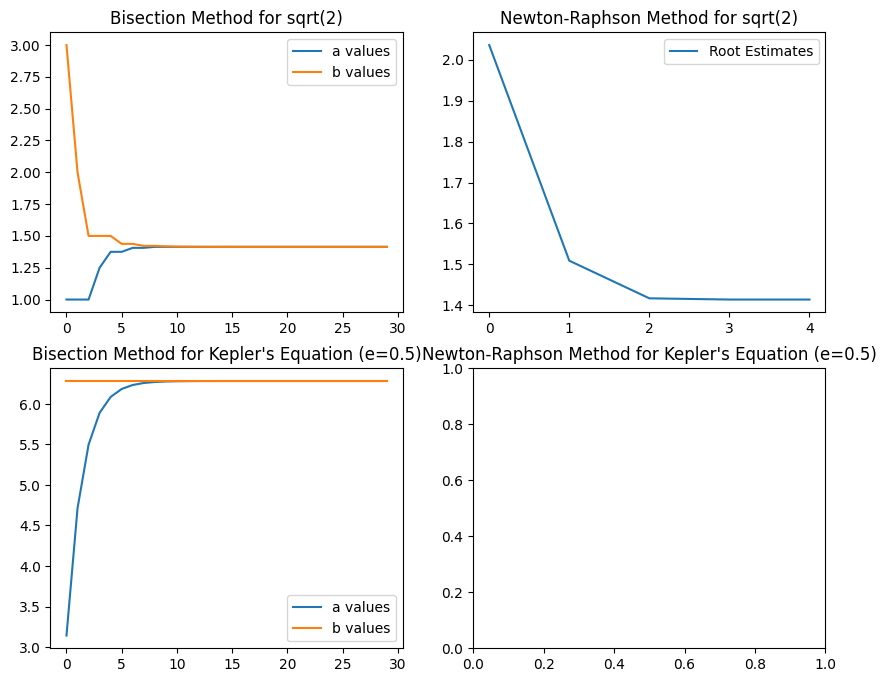

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton

# Definitions/Given values:
def func(x):
    return x**2 - 2.0

def deriFunc(x):
    return 2*x

def kepler(M, E, e):
    return M - E - e * np.sin(E)

def deriKepler(E, e):
    return -1 - e * np.cos(E)

def bisectMethod(func, ini, end, it, e=1.0, M=1.0):
    a, b = ini, end
    aArray, bArray, iters = np.zeros(it), np.zeros(it), np.zeros(it)
    for i in range(it):
        c = (a + b) / 2
        funky = func(M, c, e) if e != 1.0 and M != 1.0 else func(c)
        if funky < 0:
            a = c
        elif funky > 0:
            b = c
        else:
            break
        aArray[i], bArray[i], iters[i] = a, b, i
    return aArray, bArray, iters

def newtonMethod(func, deri, ini, tol, e=1.0, M=1.0):
    nextStart = ini + 2  # Initial step to start the loop
    result, iters = [], []
    while np.abs(ini - nextStart) > tol:
        ini = nextStart
        if M != 1.0:
            nextStart = ini - func(M, ini, e) / deri(ini, e)
        else:
            nextStart = ini - func(ini) / deri(ini)
        result.append(nextStart)
        iters.append(len(result) - 1)  # Ensure iters is appended for every result append
    return result, iters

# Bisection and Newton-Raphson Method Implementations for the given problem
a = -1.0
b = 3.0
iterations = 30
tolerance = 0.001
M = 1.5
eccentricities = [0.5, 0.9]
Pi = np.pi

# Plotting and results for the square root function
bisecAFunc, bisecBFunc, bisecIterFunc = bisectMethod(func, a, b, iterations)
newtonResultFunc, newtonItersFunc = newtonMethod(func, deriFunc, 1.5, tolerance)

# Kepler's equation for different eccentricities
results = {}
for e in eccentricities:
    bisecAKepler, bisecBKepler, bisecIterKepler = bisectMethod(kepler, 0, 2*Pi, iterations, e=e, M=M)
    newtonResultKep, newtonItersKep = newtonMethod(kepler, deriKepler, 3, tolerance, e=e, M=M)
    results[e] = (bisecAKepler, bisecBKepler, newtonResultKep)

# Displaying results
print("Results for the square root of 2 using Bisection and Newton-Raphson Methods:")
print("Bisection method results:", bisecAFunc)
print("Newton-Raphson method results:", newtonResultFunc)

# Plotting
plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.title("Bisection Method for sqrt(2)")
plt.plot(bisecIterFunc, bisecAFunc, label='a values')
plt.plot(bisecIterFunc, bisecBFunc, label='b values')
plt.legend()

plt.subplot(222)
plt.title("Newton-Raphson Method for sqrt(2)")
plt.plot(newtonItersFunc, newtonResultFunc, label='Root Estimates')
plt.legend()

for e in eccentricities:
    plt.subplot(223)
    plt.title(f"Bisection Method for Kepler's Equation (e={e})")
    bisecAKepler, bisecBKepler, _ = results[e]
    plt.plot(bisecIterKepler, bisecAKepler, label='a values')
    plt.plot(bisecIterKepler, bisecBKepler, label='b values')
    plt.legend()

    plt.subplot(224)
    plt.title(f"Newton-Raphson Method for Kepler's Equation (e={e})")
    _, _, newtonResultKep = results[e]
    plt.plot(newtonItersKep, newtonResultKep, label='Root Estimates')
    plt.legend()

plt.tight_layout()
plt.show()


In [4]:
print("Length of newtonItersKep:", len(newtonItersKep))
print("Length of newtonResultKep:", len(newtonResultKep))

# Ensure they match before attempting to plot
if len(newtonItersKep) == len(newtonResultKep):
    plt.plot(newtonItersKep, newtonResultKep, label='Root Estimates')
else:
    print("Warning: The lengths of iterations and results do not match.")


Length of newtonItersKep: 20
Length of newtonResultKep: 5
